Road Segmentation
Road Surface Segmentation
Driveable Area Segmentation

Drive Bağlama

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/

/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation


ORTAM HAZIRLIĞI


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


SEGMENTASYON TESTİ - TEST CLI


In [ ]:
!yolo segment predict model=yolov8l-seg.pt source="https://cdn1.epicgames.com/ue/product/Screenshot/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg" show_labels=True show_boxes=False

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

Found https://cdn1.epicgames.com/ue/product/Screenshot/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg locally at 3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg
image 1/1 /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg: 384x640 3 cars, 1 fire hydrant, 1 suitcase, 1 potted plant, 84.6ms
Speed: 2.2ms preprocess, 84.6ms inference, 501.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


img shape: (1080, 1920, 3)
img shape changed: (360, 640, 3)


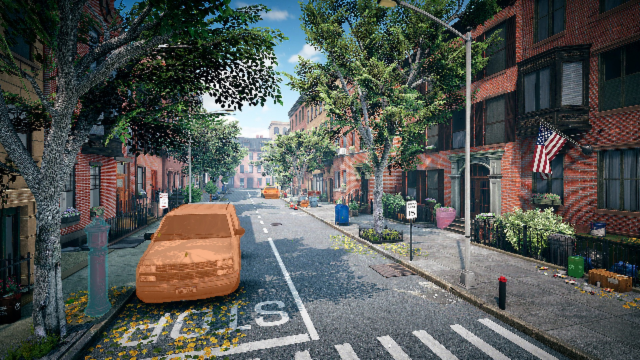

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/runs/segment/predict2/3-1920x1080-2d0741389a27fd438c44e5ff90d27b39.jpg"
img=cv2.imread(path)
print("img shape:",img.shape)
img=imutils.resize(img,width=640)
print("img shape changed:",img.shape)

cv2_imshow(img)

PYTHON IMPLEMENTATİON

In [ ]:
####
#Library
#Image & Model
#Predicttion & Score
#Show results
####

Training


In [ ]:
!unzip /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/data/road_surface_dataset.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 extracting: ./data/train/images/00071_K2zYpFPmgy_png.rf.1e35e776b676cfab1c69d768913c2443.jpg  
 extracting: ./data/train/images/00071_K2zYpFPmgy_png.rf.703401f6552afeb8ff7fadffe1bae3d6.jpg  
 extracting: ./data/train/images/00071_K2zYpFPmgy_png.rf.b1f9b22d64940f54a237301b522c851a.jpg  
 extracting: ./data/train/images/00071_png.rf.0078e14d674802bc7a2c905b580c189c.jpg  
 extracting: ./data/train/images/00071_png.rf.5d7a765532e517e038c05323d086d27d.jpg  
 extracting: ./data/train/images/00071_png.rf.9a3dd01d7d5d57d1b136d670e56255f7.jpg  
 extracting: ./data/train/images/00072_6pluDjEi2E_png.rf.285b0b000b34bc40117dd3ad04783b13.jpg  
 extracting: ./data/train/images/00072_6pluDjEi2E_png.rf.286b4ed8db43d741765e246dc7620a69.jpg  
 extracting: ./data/train/images/00072_6pluDjEi2E_png.rf.b649ec872b654212fa52289eb16fe8a9.jpg  
 extracting: ./data/train/images/00072_png.rf.063955c2300e9ed2cd8b7ae0edd49d8a.jpg  
 extracting: ./data/train/images/0007

EĞİTİME BAŞLA

In [ ]:
!yolo segment train model=yolov8l-seg.pt data=/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/data/data.yaml imgsz=640 workers=8 batch=8 device=0 epochs=35 name=yolov8_raod_segmentation patience=0

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/data/data.yaml, epochs=35, time=None, patience=0, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_raod_segmentation11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

Eğitim sonuçları gör


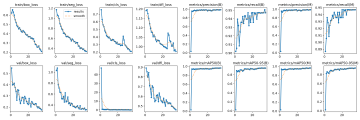

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/runs/segment/yolov8_raod_segmentation11/results.png"
img=cv2.imread(img_path)
img=imutils.resize(img,width=360)

cv2_imshow(img)

img shape: (640, 640, 3)

0: 640x640 1 road, 76.4ms
Speed: 3.5ms preprocess, 76.4ms inference, 502.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


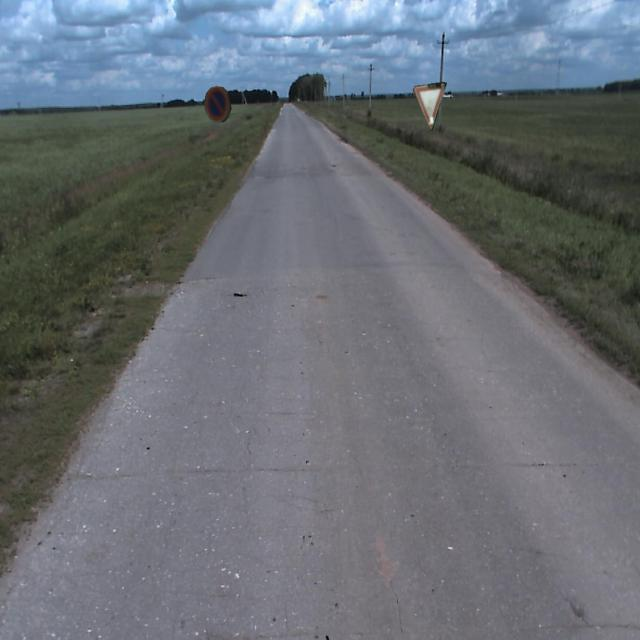

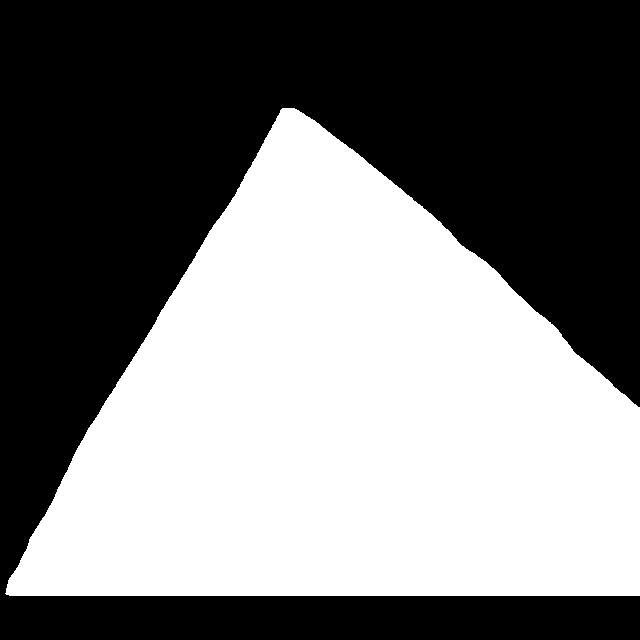

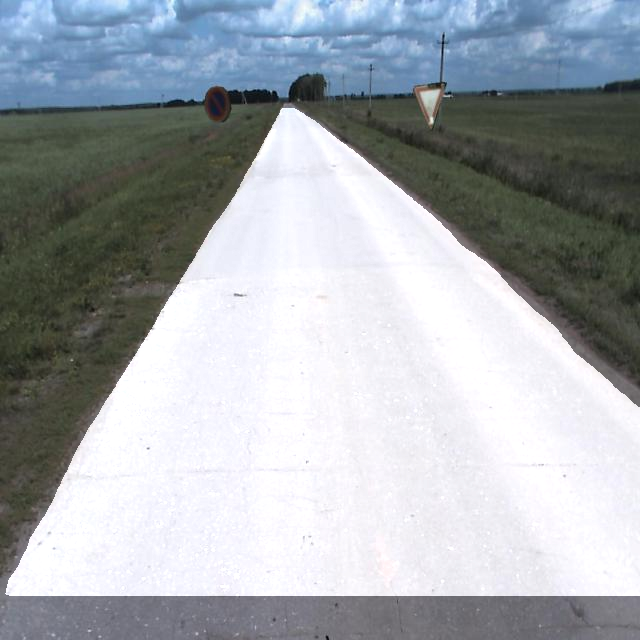

In [ ]:
import cv2
import torch
import imutils

import numpy as np
from ultralytics import YOLO

img_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/data/test/images/00434_png.rf.95f46c0e01047d087fd4ccf840d36179.jpg"
model_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/runs/segment/yolov8_raod_segmentation11/weights/best.pt"

img=cv2.imread(img_path)
print("img shape:",img.shape)

img=cv2.resize(img,(640,640))

model=YOLO(model_path)
results=model.predict(source=img.copy(),save=True,save_txt=False,stream=True)

for result in results:
  masks=result.masks.data.cpu()
  boxes=result.boxes.data.cpu()

  clss=boxes[:,5]

  road_indices=np.where(clss==0)
  road_masks=masks[road_indices]

  road_mask=torch.any(road_masks,dim=0).int()*255
  road_mask=road_mask.cpu().numpy()
  road_mask=road_mask.astype(np.uint8)

road_mask_color=cv2.cvtColor(road_mask,cv2.COLOR_GRAY2BGR)
result_img=cv2.addWeighted(img,1,road_mask_color,0.5,0)

cv2_imshow(img)
cv2_imshow(road_mask)
cv2_imshow(result_img)


Prediction CLI

In [ ]:
!yolo segment predict model="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/runs/segment/yolov8_raod_segmentation11/weights/best.pt" source="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4" show_labels=True show_boxes=False

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

video 1/1 (1/2203) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4: 640x608 1 road, 84.0ms
video 1/1 (2/2203) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4: 640x608 1 road, 53.3ms
video 1/1 (3/2203) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4: 640x608 1 road, 53.2ms
video 1/1 (4/2203) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4: 640x608 1 road, 52.9ms
video 1/1 (5/2203) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4: 640x608 1 road, 42.6ms
video 1/1 (6/2203) /content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/game2.mp4: 640x608 1 road, 42.9ms
video 1/1 (7/2203) /content/gdrive/MyDrive/YOLOv8PROJE/S

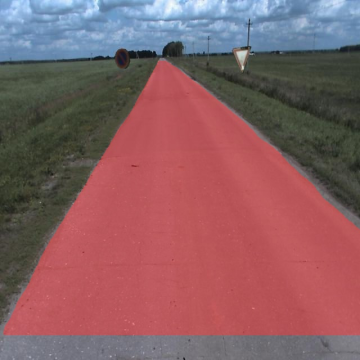

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/runs/segment/predict5/00434_png.rf.95f46c0e01047d087fd4ccf840d36179.jpg"
img=cv2.imread(img_path)
img=imutils.resize(img,width=360)

cv2_imshow(img)

In [ ]:
from google.colab import files

files.download("/content/gdrive/MyDrive/YOLOv8PROJE/SelfDrivingCarProject/RoadSegmentation/runs/segment/predict6/game2.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>